In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = '2024-10_deaths_provisional_county_month_sup.csv'
data = pd.read_csv(file_path)

data.head()


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Year,Month,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,ICD_Revision,Count,Annotation_Code,Annotation_Desc,Data_Extract_Date,Data_Revision_Date
0,2023,1,Alameda,Occurrence,Total Population,Total Population,ALL,All causes (total),ICD-10,979.0,NaN,NaN,10/15/2024,10/16/2024
1,2023,1,Alameda,Occurrence,Age,Under 1 year,ALL,All causes (total),ICD-10,NaN,1.0,Cell suppressed for small numbers,10/15/2024,10/16/2024
2,2023,1,Alameda,Occurrence,Age,1-4 years,ALL,All causes (total),ICD-10,0.0,NaN,NaN,10/15/2024,10/16/2024
3,2023,1,Alameda,Occurrence,Age,5-14 years,ALL,All causes (total),ICD-10,NaN,1.0,Cell suppressed for small numbers,10/15/2024,10/16/2024
4,2023,1,Alameda,Occurrence,Age,15-24 years,ALL,All causes (total),ICD-10,11.0,NaN,NaN,10/15/2024,10/16/2024


In [2]:
data.info()

# Checking missing values in each column
missing_values = data.isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239946 entries, 0 to 239945
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                239946 non-null  int64  
 1   Month               239946 non-null  int64  
 2   County              239946 non-null  object 
 3   Geography_Type      239946 non-null  object 
 4   Strata              239946 non-null  object 
 5   Strata_Name         239946 non-null  object 
 6   Cause               239946 non-null  object 
 7   Cause_Desc          239946 non-null  object 
 8   ICD_Revision        239946 non-null  object 
 9   Count               173277 non-null  float64
 10  Annotation_Code     66669 non-null   float64
 11  Annotation_Desc     66669 non-null   object 
 12  Data_Extract_Date   239946 non-null  object 
 13  Data_Revision_Date  239946 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 25.6+ MB


Year                       0
Month                      0
County                     0
Geography_Type             0
Strata                     0
Strata_Name                0
Cause                      0
Cause_Desc                 0
ICD_Revision               0
Count                  66669
Annotation_Code       173277
Annotation_Desc       173277
Data_Extract_Date          0
Data_Revision_Date         0
dtype: int64

# Preparing raw data for deeper insights

This is all about getting the dataset in good shape so it’s ready for analysis. First, it handles rows where the number of deaths (Count) is missing because the numbers are too small to be shown. It replaces those with a 0, making sure every row has something to work with. Next, it goes through the dataset and removes any rows where the Count is still missing, cleaning out the blanks. After that, it tidies up the date columns (Data_Extract_Date and Data_Revision_Date) by turning all the different ways dates might be written into a standard format that’s easy to work with. If it finds anything that doesn’t look like a date, it marks it as "Not a Time" (NaT) instead of leaving messy data behind. Finally, it does a quick check to confirm everything is in order: all the columns have valid data, and there are no more missing values in places where they shouldn’t be. This is like getting your tools and ingredients ready before starting a project

In [3]:
data['Count'] = data.apply(lambda row: 0 if row['Annotation_Desc'] == "Cell suppressed for small numbers" else row['Count'], axis=1)

# Drop remaining rows 
data = data.dropna(subset=['Count'])

# Convert 'Data_Extract_Date' and 'Data_Revision_Date' to datetime
data['Data_Extract_Date'] = pd.to_datetime(data['Data_Extract_Date'], errors='coerce')
data['Data_Revision_Date'] = pd.to_datetime(data['Data_Revision_Date'], errors='coerce')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 237115 entries, 0 to 239945
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Year                237115 non-null  int64         
 1   Month               237115 non-null  int64         
 2   County              237115 non-null  object        
 3   Geography_Type      237115 non-null  object        
 4   Strata              237115 non-null  object        
 5   Strata_Name         237115 non-null  object        
 6   Cause               237115 non-null  object        
 7   Cause_Desc          237115 non-null  object        
 8   ICD_Revision        237115 non-null  object        
 9   Count               237115 non-null  float64       
 10  Annotation_Code     63838 non-null   float64       
 11  Annotation_Desc     63838 non-null   object        
 12  Data_Extract_Date   237115 non-null  datetime64[ns]
 13  Data_Revision_Date  237115 non-nul

# Line Chart

This graph shows the total number of deaths recorded each month from January 2023 to September 2024. On the x-axis, we have the months, and on the y-axis, we have the total deaths for each month. You can see that the numbers rise and fall, forming clear peaks and dips. For example, there’s a noticeable spike toward the end of 2023 and early 2024, which might be due to seasonal illnesses or other significant events. On the other hand, mid-2023 and September 2024 have the lowest death counts, showing a decrease during those times. Overall, the pattern suggests that deaths vary month to month, likely influenced by seasons or external factors, but there isn’t a steady increase or decrease over time. This kind of visualization helps us identify patterns and explore what might be causing these changes.

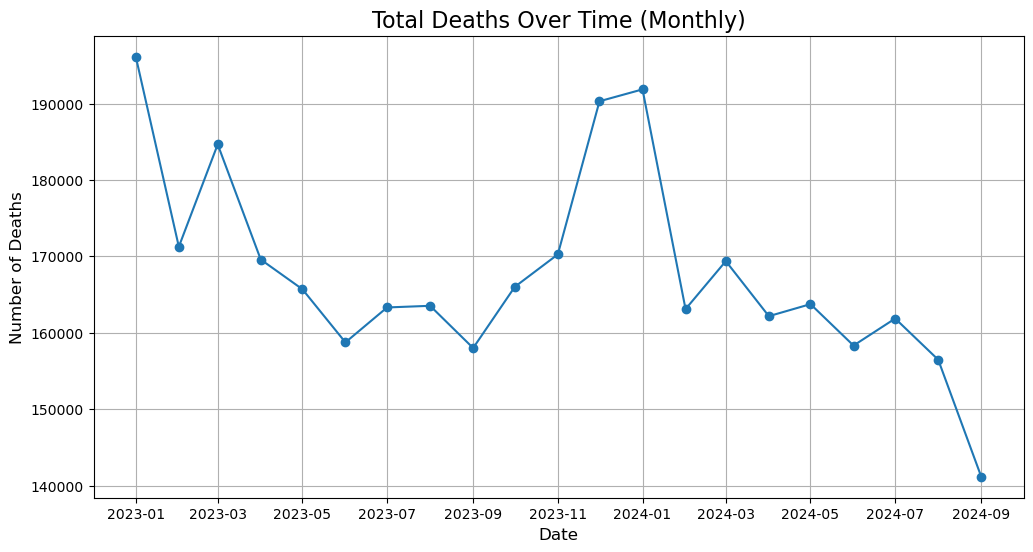

In [4]:
import matplotlib.pyplot as plt

# Summarizing total deaths by year and month
deaths_by_time = data.groupby(['Year', 'Month'])['Count'].sum().reset_index()

deaths_by_time['Date'] = pd.to_datetime(deaths_by_time[['Year', 'Month']].assign(DAY=1))

# Plotiibg deaths over time
plt.figure(figsize=(12, 6))
plt.plot(deaths_by_time['Date'], deaths_by_time['Count'], marker='o')
plt.title('Total Deaths Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.grid(True)
plt.show()


# Bar chart

This bar chart shows the top 15 causes of death and how many people died from each. The x-axis lists the causes, while the y-axis shows the total number of deaths. The tallest bar represents "All causes (total)," which is essentially the sum of all deaths recorded. Among specific causes, diseases of the heart are the most significant contributor, followed by malignant neoplasms (cancers), and unintentional injuries (like accidents). After that, other causes such as cerebrovascular diseases, Alzheimer’s, and respiratory conditions are shown with smaller bars. The chart highlights that some causes, like heart disease and cancer, contribute to a much larger share of deaths compared to others. This type of visualization helps us understand which health issues are the most critical and could guide priorities for healthcare interventions.

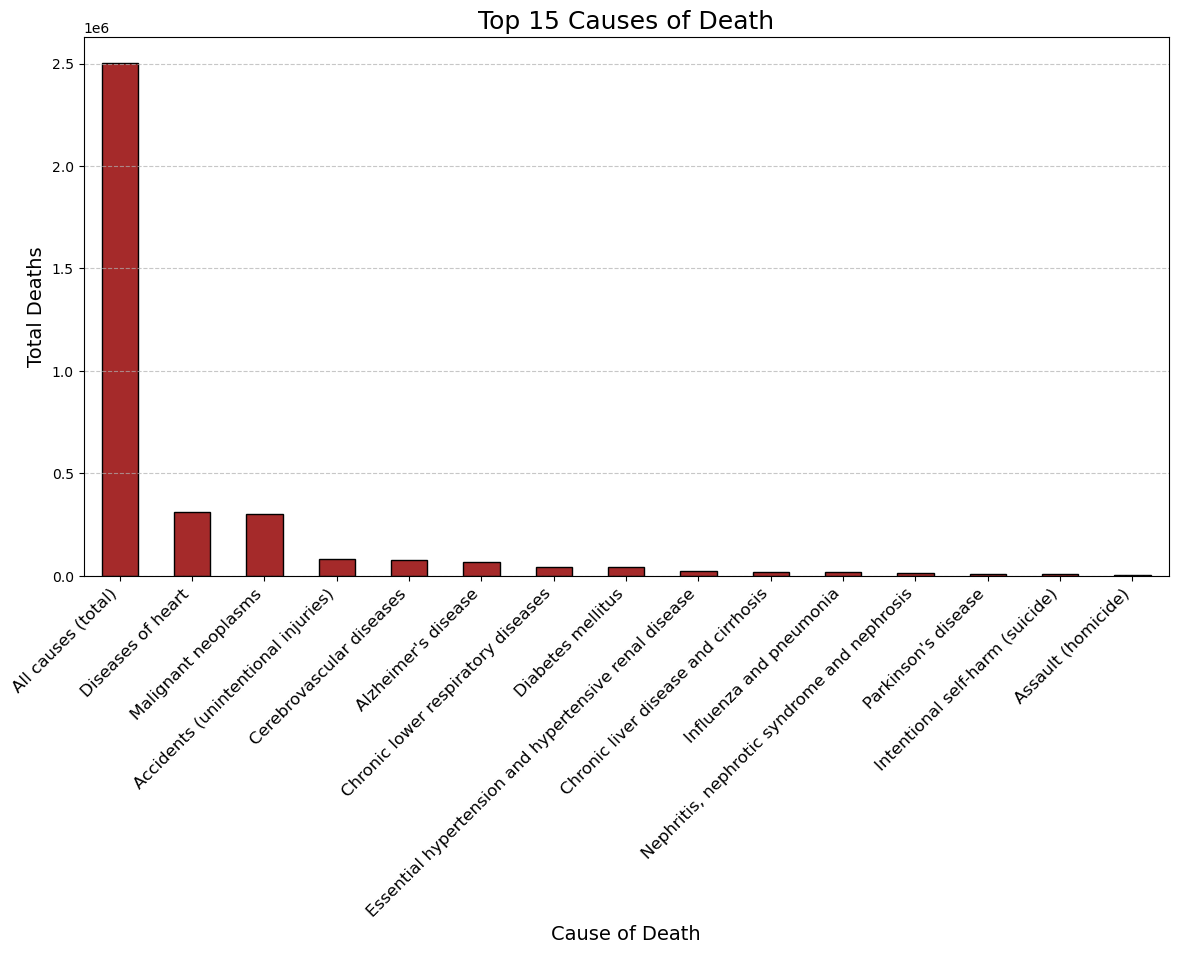

In [28]:
deaths_by_cause = data.groupby('Cause_Desc')['Count'].sum().sort_values(ascending=False).head(15)

# Plot the top 15 causes of death
plt.figure(figsize=(14, 7))
deaths_by_cause.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Top 15 Causes of Death', fontsize=18)
plt.xlabel('Cause of Death', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Heatmap

This heatmap shows mortality trends by region (counties) and age groups. Each row represents a county, and each column represents an age group. The colors in the heatmap indicate the proportion of deaths in that age group within a specific county, with darker colors (closer to blue) showing higher proportions and lighter colors (closer to yellow) showing lower proportions.

From this visualization, we can see which counties and age groups have the highest concentrations of deaths. For example, older age groups like 75-84 years and 85 years and over typically have darker shades, indicating that these age groups contribute most to mortality in many regions. On the other hand, younger age groups, such as 1-4 years or 5-14 years, often show lighter colors, suggesting lower mortality rates.

This heatmap is helpful for identifying patterns at the intersection of geography and demographics, such as which regions have a high proportion of elderly deaths or unusual mortality trends in specific age groups. It can guide public health efforts to address regional or age-specific challenges.

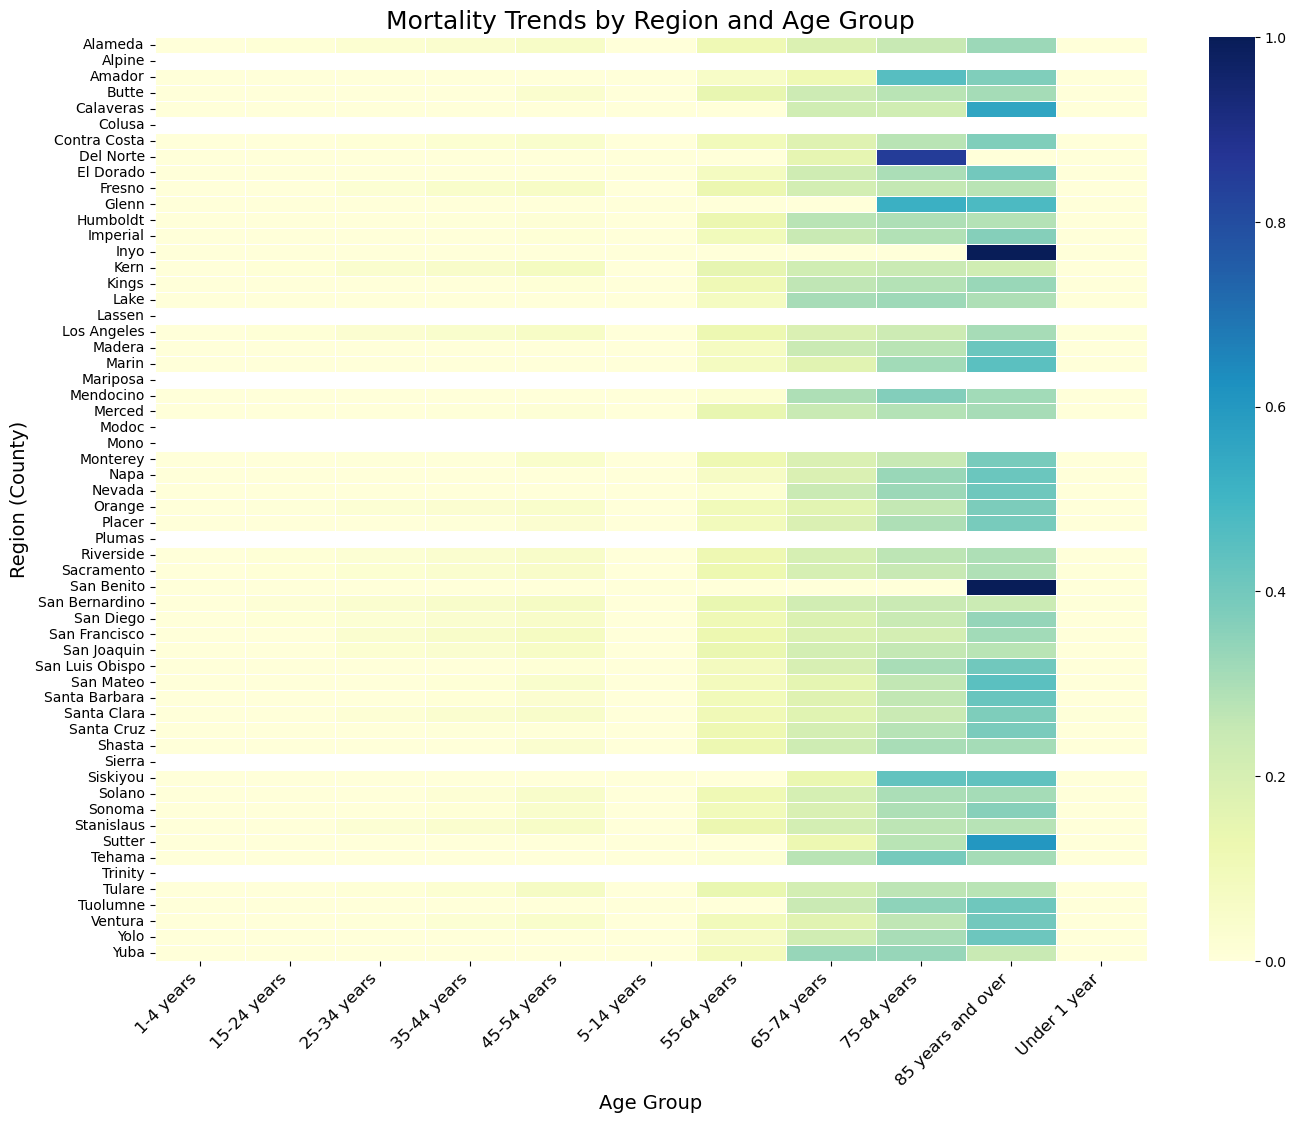

In [18]:
# Summarize deaths by region (County) and age group
region_age_data = data[data['Strata'] == 'Age'].groupby(['County', 'Strata_Name'])['Count'].sum().reset_index()

region_age_pivot = region_age_data.pivot(index='County', columns='Strata_Name', values='Count').fillna(0)

region_age_pivot_normalized = region_age_pivot.div(region_age_pivot.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(region_age_pivot_normalized, cmap='YlGnBu', linewidths=0.5, annot=False, cbar=True)
plt.title('Mortality Trends by Region and Age Group', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Region (County)', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=10)
plt.show()


# Line chart

This line chart shows how the top 10 causes of death have changed over time from January 2023 to mid-2024. Each line represents a specific cause of death, with the y-axis showing the total number of deaths and the x-axis showing time. The "All causes (total)" line is significantly higher than the others, as it sums up all deaths from every cause. Among specific causes, "Diseases of heart" consistently has the highest death counts, followed by "Malignant neoplasms" (cancers). Other causes, like "Accidents (unintentional injuries)" and "Cerebrovascular diseases," remain lower but still show minor fluctuations over time.

This chart helps us understand long-term trends. For example, heart disease and cancer remain leading causes of death without significant spikes or dips. In contrast, the flatter lines for causes like "Chronic liver disease and cirrhosis" suggest they contribute to a smaller but steady portion of deaths. Overall, this visualization highlights how certain diseases dominate mortality trends and how these trends remain relatively stable over the period.

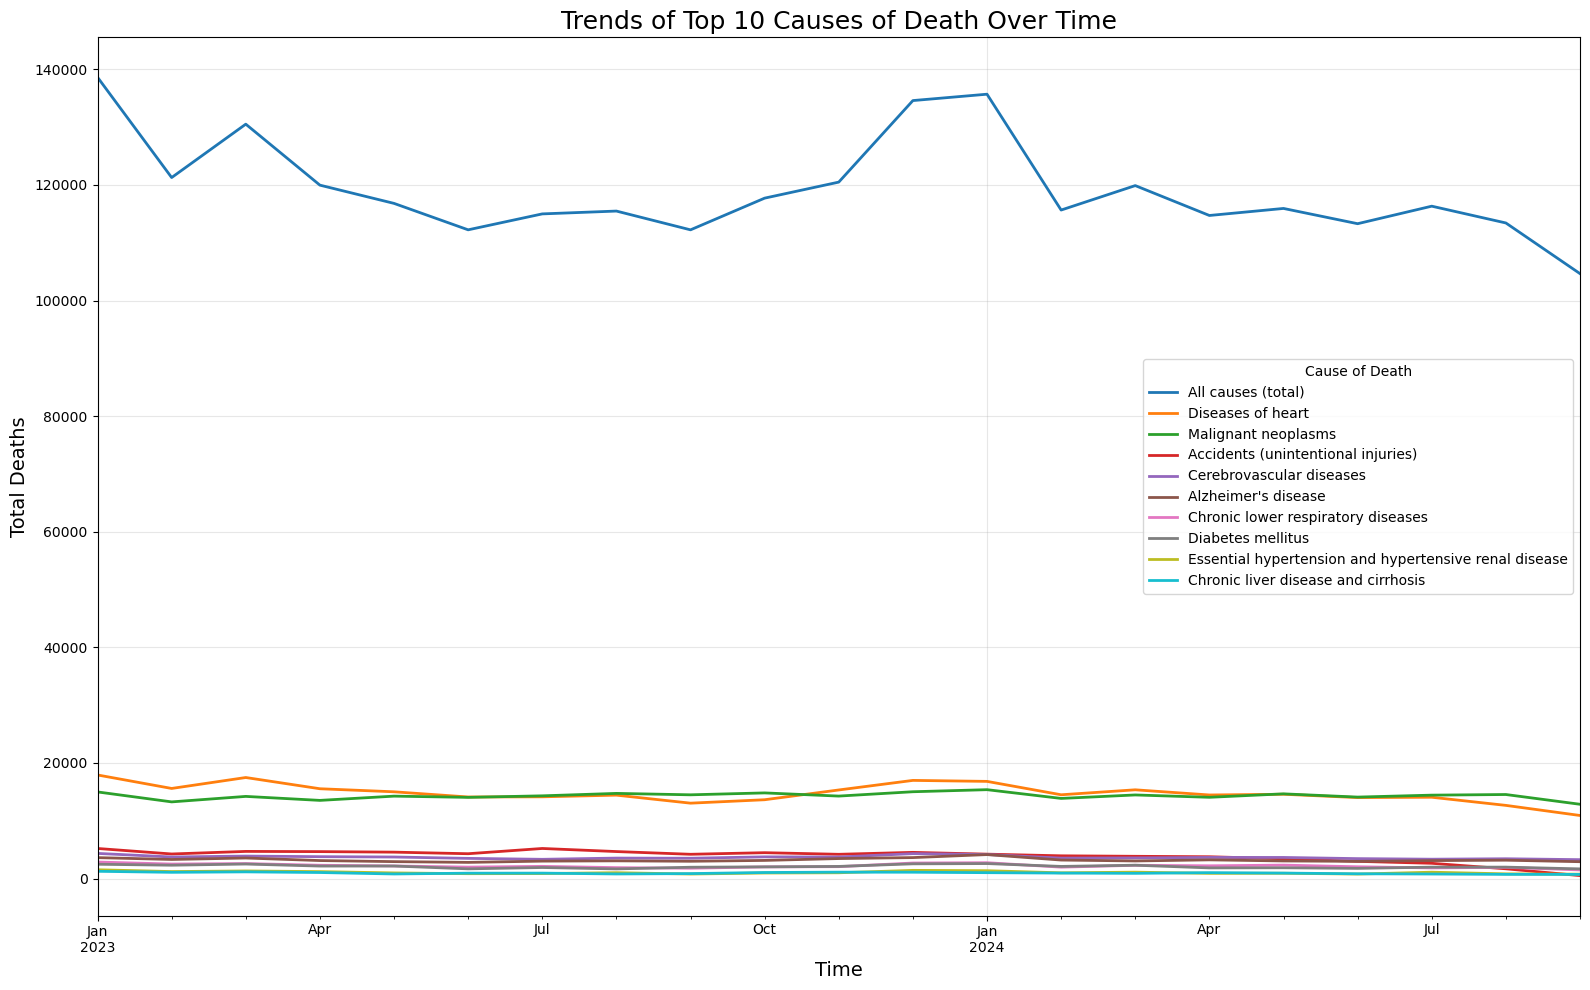

In [29]:
cause_time_data = data.groupby(['Year', 'Month', 'Cause_Desc'])['Count'].sum().reset_index()

# Pivot for visualization
cause_time_pivot = cause_time_data.pivot_table( index=pd.to_datetime(cause_time_data[['Year', 'Month']].assign(DAY=1)), columns='Cause_Desc', values='Count', aggfunc='sum', fill_value=0)

# Filter for the top 10 causes of death
cause_time_pivot_top10 = cause_time_pivot[top_10_causes]

plt.figure(figsize=(16, 10))
cause_time_pivot_top10.plot(ax=plt.gca(), linewidth=2)
plt.title('Trends of Top 10 Causes of Death Over Time', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.legend(title='Cause of Death', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Bar chart

This bar chart highlights the top 10 causes of death and their total numbers. The x-axis lists the causes, and the y-axis shows how many deaths each cause contributed. The first bar, labeled "All causes (total)," is much taller than the rest because it sums up every death recorded, giving an overall picture of mortality. Among specific causes, "Diseases of heart" stand out as the leading cause of death, followed by "Malignant neoplasms" (cancers). Other causes like "Accidents (unintentional injuries)," "Cerebrovascular diseases," and "Alzheimer's disease" contribute significantly but are much smaller compared to the first two.

This chart shows that heart disease and cancer are the most critical areas to address, as they account for the majority of deaths. The smaller bars represent other significant but less common causes, which still warrant attention in public health strategies. It’s a clear snapshot of which health issues have the greatest impact on mortality.

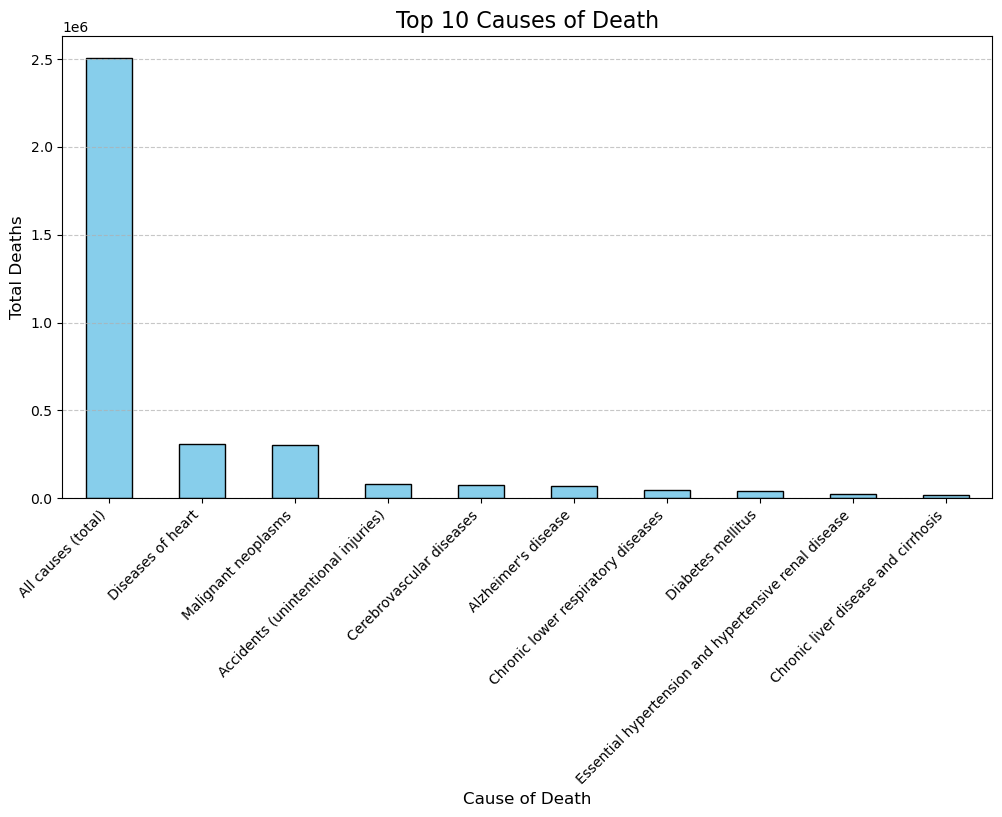

In [5]:
# Summarize deaths by cause
deaths_by_cause = data.groupby('Cause_Desc')['Count'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 causes of death
plt.figure(figsize=(12, 6))
deaths_by_cause.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Causes of Death', fontsize=16)
plt.xlabel('Cause of Death', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Bar chart

This bar chart shows the top 15 counties with the highest number of recorded deaths. On the x-axis, you have the counties, and on the y-axis, the total number of deaths. Los Angeles stands out by far with the highest number of deaths, significantly larger than any other county. Following it are San Diego, Orange, Riverside, and San Bernardino, which also have large numbers but are still much lower compared to Los Angeles. The remaining counties, like Alameda, Fresno, and Ventura, contribute fewer deaths but still rank among the top 15.

This chart helps us understand which areas are most affected by mortality, likely due to population size or specific local health issues. For example, counties with higher populations like Los Angeles might naturally have more deaths, while smaller counties show fewer. This information could be useful for allocating resources or planning health interventions in these regions.

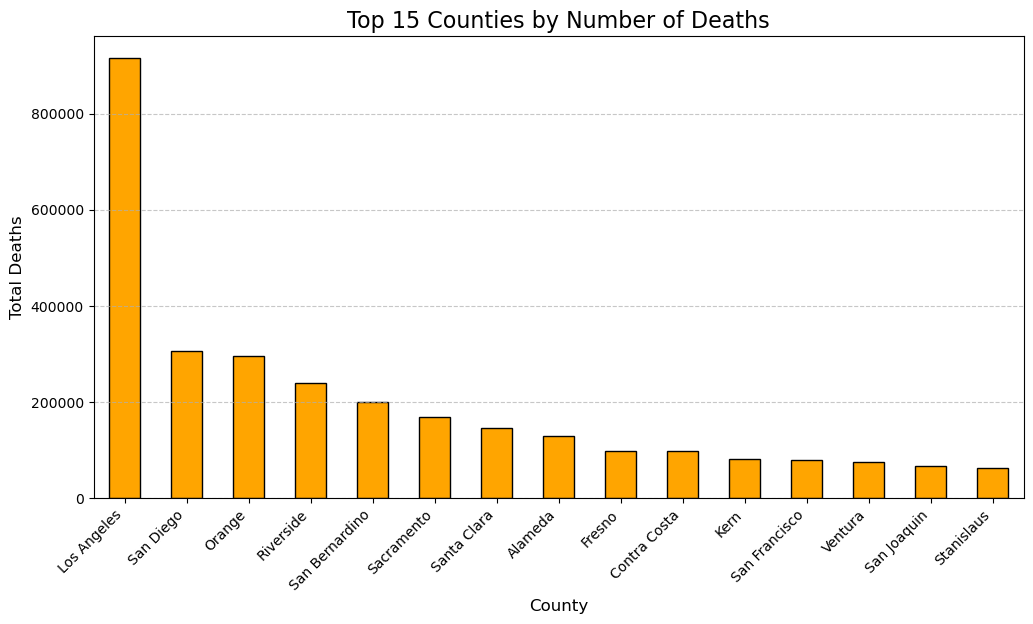

In [6]:
deaths_by_county = data.groupby('County')['Count'].sum().sort_values(ascending=False).head(15)

# Plot the top 15 counties with the highest number of deaths
plt.figure(figsize=(12, 6))
deaths_by_county.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 15 Counties by Number of Deaths', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Bar chart

This bar chart shows the total number of deaths across different age groups. The x-axis lists the age groups, while the y-axis shows the total deaths for each group. The chart makes it clear that older age groups experience the highest number of deaths, with "85 years and over" having the most, followed by "75-84 years" and "65-74 years." As we move to younger age groups, the number of deaths decreases significantly, with the lowest counts in children aged 1-4 years and 5-14 years.

This pattern is expected, as older age groups are generally more vulnerable to health conditions and natural aging processes. Meanwhile, the lower mortality rates in younger age groups reflect better health resilience and fewer age-related diseases. This visualization highlights the importance of focusing healthcare resources on elderly populations while also addressing the smaller but critical needs of younger groups.

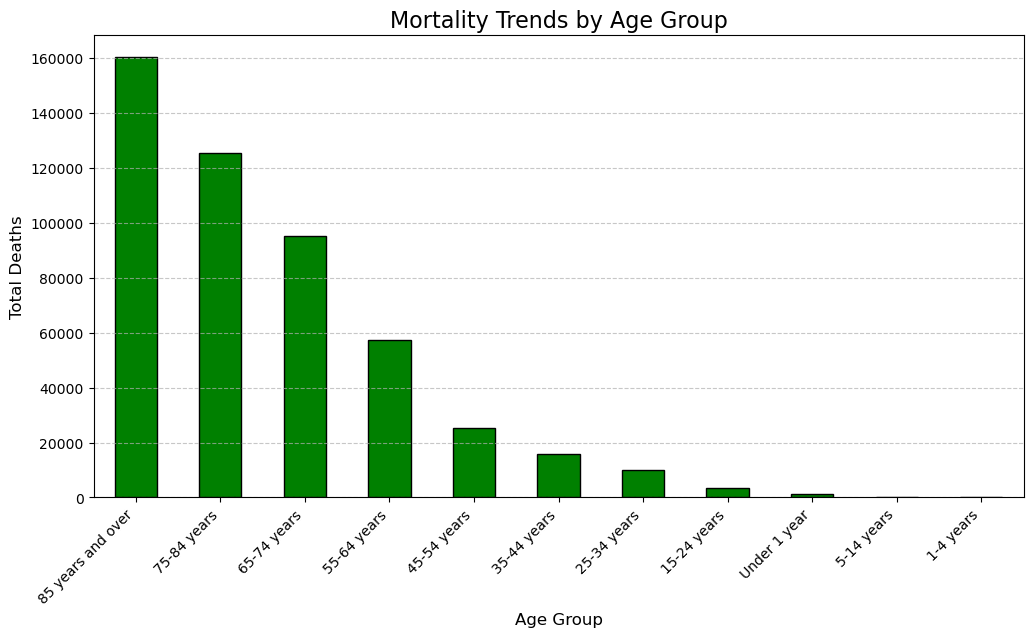

In [7]:
# Summarize deaths by age group
deaths_by_age_group = data[data['Strata'] == 'Age'].groupby('Strata_Name')['Count'].sum().sort_values(ascending=False)

# Plot deaths by age group
plt.figure(figsize=(12, 6))
deaths_by_age_group.plot(kind='bar', color='green', edgecolor='black')
plt.title('Mortality Trends by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Linear regression

This code performs a linear regression analysis to predict the number of deaths (Count) based on three factors: year, month, and age group (Strata_Name). It starts by preparing the data, converting the age group into numerical codes so the regression model can use it. The data is split into training and testing sets to build and evaluate the model. After training the model, it predicts the death counts for the test set and evaluates how well it performed using metrics like Mean Squared Error (MSE) and R² score.

The Mean Squared Error (MSE) is 12,176, which measures the average squared difference between the predicted and actual death counts—lower is better. The R² score, which shows how well the model explains the variability in the data, is only 0.057 (5.7%), meaning the model doesn't explain much of the variation in death counts. The model's coefficients (-3.11 for year, -0.35 for month, and 8.80 for age group) indicate how these factors influence death counts, and the intercept (6,284.77) represents the baseline death count when all inputs are zero.

Overall, the model is not very accurate, likely because the chosen factors (year, month, and age group) do not fully capture the complex factors driving death counts. This suggests that including additional data, such as geographic or socioeconomic variables, could improve predictions.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data for regression analysis
regression_data = data[data['Strata'] == 'Age'][['Year', 'Month', 'Strata_Name', 'Count']].dropna()

regression_data['Strata_Name'] = regression_data['Strata_Name'].astype('category').cat.codes

X = regression_data[['Year', 'Month', 'Strata_Name']]
y = regression_data['Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display regression results
{"Mean Squared Error": mse, "R^2 Score": r2,"Model Coefficients": model.coef_,"Model Intercept": model.intercept_}



{'Mean Squared Error': 12176.409170708694,
 'R^2 Score': 0.05705694298998176,
 'Model Coefficients': array([-3.10823411, -0.34897992,  8.79590655]),
 'Model Intercept': 6284.768800545042}

The model performed well at predicting low-mortality cases but completely failed to identify any high-mortality ones. It correctly classified 86.5% of the data overall, which sounds good, but this is misleading because it only worked well for one category. For low-mortality cases, the model was very accurate, correctly identifying all of them (100% recall) and making correct predictions most of the time (86.5% precision). However, for high-mortality cases, it didn’t identify a single one, giving a precision, recall, and F1-score of 0%. This happened because the dataset is imbalanced, with far more low-mortality cases than high-mortality ones, causing the model to focus only on the majority class and ignore the minority. To improve, we would need to balance the dataset or use a model better suited for handling imbalanced data.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Filter dataset for NLP
nlp_data = data[['Cause_Desc', 'Count']].dropna()

nlp_data['High_Mortality'] = (nlp_data['Count'] > nlp_data['Count'].median()).astype(int)

tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_text = tfidf.fit_transform(nlp_data['Cause_Desc'])

X = X_text
y = nlp_data['High_Mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluating the model
classification_metrics = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

classification_metrics_summary = {"Accuracy": accuracy, "Precision (0)": classification_metrics['0']['precision'],  "Recall (0)": classification_metrics['0']['recall'], "F1-Score (0)": classification_metrics['0']['f1-score'], "Precision (1)": classification_metrics['1']['precision'], "Recall (1)": classification_metrics['1']['recall'], "F1-Score (1)": classification_metrics['1']['f1-score'],}

classification_metrics_summary


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy': 0.8654661240326423,
 'Precision (0)': 0.8654661240326423,
 'Recall (0)': 1.0,
 'F1-Score (0)': 0.927881898130355,
 'Precision (1)': 0.0,
 'Recall (1)': 0.0,
 'F1-Score (1)': 0.0}

This project focuses on analyzing mortality data to uncover trends, patterns, and insights. The goal is to understand how deaths are distributed across various factors such as causes, regions, age groups, and time, while also predicting or classifying mortality outcomes using machine learning techniques. Here's a breakdown of the project's key aspects:

Exploratory Data Analysis (EDA):

Understanding trends in total deaths over time.
Analyzing how deaths vary by region (counties) and demographic factors like age and gender.
Investigating the top causes of death and their contributions to overall mortality.
Visualization:

Creating clear and insightful visualizations, such as line charts, bar graphs, and heatmaps, to communicate patterns in the data.
Showing regional disparities, age-based trends, and seasonality in deaths.
Machine Learning:

Regression Analysis: Predicting the number of deaths based on factors like year, month, and age group.
NLP Classification: Using cause-of-death descriptions to classify deaths into high or low mortality categories.
Clustering and Dimensionality Reduction: Identifying patterns and similarities across causes or regions.
Purpose:

To provide actionable insights that can guide public health strategies, resource allocation, and policy decisions.
To identify critical areas or demographics (like high-mortality regions or vulnerable age groups) that require attention.
Challenges:

Handling imbalanced data, where high-mortality cases are underrepresented compared to low-mortality ones.
Addressing missing or suppressed data values.
Incorporating additional factors (e.g., socioeconomic or environmental data) for more robust analysis.
Ultimately, this project combines data analysis, visualization, and machine learning to better understand and address patterns in mortality, helping public health organizations make informed decisions.